In [1]:
import sympy as sp
import minterpy as mp
import numpy as np
from minterpy.pointcloud_utils import *

from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d

import torch
import torchvision
from torchvision import transforms, datasets

import random
import numpy as np
import matplotlib.pyplot as plt

import os
from operator import itemgetter

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import ot

from sklearn.neighbors import NearestNeighbors

import ripser
import persim
from persim import plot_diagrams

from operator import itemgetter


#do pip installs as follows to use vedo for plotting point clouds
#pip install vedo
#pip install ipyvtklink

import numpy as np
from vedo import *

import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

import time
torch.set_printoptions(precision=30)


In [2]:
def _compute_distance_matrix(x, p=2):
    x_flat = x.view(x.size(0), -1)

    distances = torch.norm(x_flat[:, None] - x_flat, dim=2, p=p)

    return distances

def get_persistence_diagram(point_cloud, maximum_dim):

    point_cloud = torch.tensor(point_cloud)

    dist_matrix = _compute_distance_matrix(point_cloud, p=2)
    diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=maximum_dim)['dgms']
    return diagrams, plot_diagrams(diagrams, show=True)


def random_sampling_from_pt_cloud(point_cloud, req_sample_size):
    
    point_cloud = torch.tensor(point_cloud)

    idx = np.random.randint(point_cloud.shape[0], size=req_sample_size)

    random_Sampled_point_cloud = point_cloud[idx,:]

    return random_Sampled_point_cloud

In [3]:
x, y, z = sp.symbols('x y z')

expr = x**2 + y**2 + z**2 - 1
poly = sp.Poly(expr, x, y, z)

# convert sympy polynomial to minyterpy polynomial
newt_poly = sympy_to_mp(poly, mp.NewtonPolynomial)


#sample points
point_data = sample_points_on_poly(1000,        # Number of points to be sampled
                                   newt_poly,  # Polynomial in Newton basis
                                   bounds=1, # Boundary of the Cubic domain to be sampled
                                   tol=1e-15)  # Tolerance in solution

In [4]:
random_pts = random_sampling_from_pt_cloud(point_data, 80)

In [5]:
random_pts = torch.unique(random_pts, dim=0)

In [6]:
random_pts.shape

torch.Size([78, 3])

In [7]:

PH_7_giving_30_points = torch.tensor([[ 0.5738, -0.1217,  0.8099],
        [-0.4035,  0.7019, -0.5870],
        [ 0.7303, -0.3869,  0.5630],
        [ 0.8971,  0.3825,  0.2210],
        [ 0.4737,  0.6196,  0.6259],
        [ 0.2366,  0.3971, -0.8868],
        [-0.8723, -0.3745, -0.3145],
        [-0.1204,  0.1281, -0.9844],
        [ 0.3959,  0.6088, -0.6875],
        [-0.8566,  0.1515,  0.4933],
        [-0.0366, -0.6735,  0.7383],
        [ 0.1010, -0.3231, -0.9410],
        [-0.9367, -0.2104,  0.2798],
        [-0.4023,  0.2617, -0.8773],
        [-0.7749,  0.4295, -0.4638],
        [ 0.4113,  0.6073,  0.6797],
        [ 0.1690,  0.7614, -0.6259],
        [-0.3786, -0.4929, -0.7834],
        [ 0.3846,  0.2930,  0.8753],
        [-0.3639, -0.6566,  0.6607],
        [-0.5986,  0.7731,  0.2096],
        [ 0.6488, -0.3099, -0.6950],
        [-0.4391, -0.6711, -0.5974],
        [ 0.3209, -0.6878, -0.6511],
        [ 0.7513,  0.3147, -0.5801],
        [ 0.3028,  0.8917,  0.3365],
        [ 0.1806, -0.9513, -0.2499],
        [-0.5198, -0.6968,  0.4943],
        [-0.9573, -0.1228, -0.2618],
        [-0.2985,  0.5618,  0.7716]], dtype=torch.float64)

PH_8_giving_40_points = torch.tensor([[-0.1724,  0.6586,  0.7325],
        [ 0.2713, -0.1220,  0.9547],
        [ 0.1882, -0.9015, -0.3897],
        [-0.9445,  0.3227, -0.0617],
        [-0.7393, -0.4762,  0.4760],
        [-0.0352,  0.7986, -0.6009],
        [ 0.1162, -0.3318, -0.9362],
        [-0.0163, -0.1476,  0.9889],
        [ 0.7336, -0.6714, -0.1050],
        [-0.4835,  0.5424, -0.6871],
        [ 0.8664, -0.1362, -0.4805],
        [-0.5724, -0.5164, -0.6369],
        [ 0.5185,  0.8413,  0.1531],
        [-0.1293, -0.7402,  0.6598],
        [-0.2941,  0.9557, -0.0104],
        [ 0.2436,  0.9354, -0.2562],
        [-0.0104,  0.6418, -0.7668],
        [-0.7085, -0.5757,  0.4082],
        [-0.4029,  0.8635, -0.3034],
        [-0.7054,  0.7084,  0.0221],
        [ 0.4764, -0.8767, -0.0664],
        [ 0.3562,  0.3095,  0.8816],
        [ 0.4282, -0.2256, -0.8751],
        [ 0.9888,  0.1135,  0.0972],
        [ 0.6825, -0.7305,  0.0236],
        [-0.4627, -0.4586,  0.7587],
        [-0.5022, -0.3980, -0.7677],
        [-0.6761, -0.3225,  0.6625],
        [ 0.7988, -0.5689,  0.1955],
        [-0.7241,  0.3728,  0.5803],
        [ 0.0757, -0.5107,  0.8564],
        [-0.1718, -0.6691, -0.7231],
        [ 0.7733,  0.5120,  0.3739],
        [-0.4602, -0.8877,  0.0103],
        [-0.1742, -0.6330,  0.7543],
        [-0.3916, -0.9182,  0.0597],
        [-0.7885, -0.5381,  0.2980],
        [-0.4943, -0.4132, -0.7648],
        [ 0.2958,  0.9391,  0.1747],
        [ 0.7773,  0.6242,  0.0794]], dtype=torch.float64)

In [8]:
PH_4_giving_118_points = torch.tensor([[-0.2651, -0.4322,  0.8619],
        [ 0.6898, -0.1667, -0.7045],
        [-0.0871,  0.5762, -0.8127],
        [ 0.3271,  0.8354, -0.4416],
        [-0.4939, -0.8345, -0.2442],
        [ 0.8764, -0.0884,  0.4734],
        [ 0.6431,  0.3164, -0.6974],
        [-0.7641,  0.3586,  0.5362],
        [ 0.8443, -0.5150,  0.1478],
        [-0.8358,  0.5454, -0.0636],
        [ 0.5026, -0.8323,  0.2340],
        [ 0.6222, -0.5194, -0.5857],
        [-0.2971, -0.6850, -0.6652],
        [ 0.4015,  0.6218,  0.6725],
        [ 0.2522, -0.8294,  0.4986],
        [ 0.2171,  0.0214,  0.9759],
        [-0.0700, -0.8402, -0.5377],
        [ 0.9435, -0.0952, -0.3173],
        [ 0.8551, -0.2600,  0.4485],
        [ 0.3975, -0.6439, -0.6538],
        [ 0.8225,  0.1326,  0.5531],
        [ 0.4227,  0.2453,  0.8725],
        [-0.1840,  0.9557,  0.2297],
        [ 0.4145, -0.6820,  0.6026],
        [ 0.8243, -0.2608,  0.5026],
        [ 0.9668,  0.2099, -0.1458],
        [ 0.6324,  0.6268, -0.4552],
        [-0.5974,  0.5781,  0.5558],
        [ 0.1723, -0.4043, -0.8983],
        [-0.5820,  0.0063,  0.8132],
        [ 0.4465,  0.4500,  0.7734],
        [-0.4023,  0.9135,  0.0609],
        [-0.0425,  0.8609, -0.5070],
        [-0.8300,  0.5377,  0.1485],
        [ 0.3652, -0.7955, -0.4836],
        [-0.8143,  0.4062,  0.4147],
        [ 0.4905, -0.8683,  0.0740],
        [ 0.6848,  0.4945,  0.5352],
        [ 0.5309,  0.8381,  0.1256],
        [ 0.5873,  0.5907,  0.5533],
        [-0.0060, -0.4782,  0.8783],
        [ 0.6837,  0.5609,  0.4669],
        [ 0.7228, -0.6044,  0.3349],
        [-0.1568, -0.1316, -0.9788],
        [ 0.6994,  0.0336,  0.7139],
        [ 0.7230,  0.5065,  0.4699],
        [-0.3459, -0.6676,  0.6593],
        [ 0.4704,  0.7033, -0.5331],
        [ 0.5289,  0.7670,  0.3633],
        [-0.2380,  0.5541,  0.7977],
        [ 0.0304, -0.3255, -0.9450],
        [-0.5841, -0.1504, -0.7976],
        [-0.7347,  0.6353,  0.2379],
        [-0.7347,  0.6353,  0.2379],
        [ 0.6890,  0.5570,  0.4638],
        [ 0.6761, -0.3858,  0.6276],
        [ 0.3593,  0.6688, -0.6509],
        [ 0.3584, -0.2212, -0.9070],
        [-0.5979,  0.1560,  0.7863],
        [ 0.3304,  0.6254,  0.7069],
        [ 0.7187, -0.1212,  0.6847],
        [ 0.7250, -0.6574,  0.2053],
        [ 0.7329, -0.2239, -0.6424],
        [-0.3673,  0.5145,  0.7749],
        [-0.1461,  0.7177, -0.6809],
        [-0.4623,  0.6707,  0.5800],
        [-0.4752, -0.3852,  0.7911],
        [ 0.7558, -0.5034, -0.4188],
        [ 0.2361, -0.7485, -0.6197],
        [-0.5480, -0.3019, -0.7801],
        [-0.6619,  0.5192, -0.5406],
        [ 0.1671, -0.9581,  0.2325],
        [ 0.0784,  0.7630,  0.6417],
        [-0.7134,  0.0824,  0.6959],
        [ 0.4677, -0.4491,  0.7613],
        [ 0.7457, -0.3840, -0.5445],
        [-0.1568, -0.1316, -0.9788],
        [ 0.4837,  0.6335,  0.6039],
        [ 0.8056,  0.5834, -0.1034],
        [-0.0976,  0.7299, -0.6765],
        [ 0.5915, -0.5043,  0.6291],
        [-0.3071,  0.4091,  0.8592],
        [ 0.3320, -0.5705, -0.7512],
        [ 0.5933, -0.1072,  0.7978],
        [-0.4140, -0.9004, -0.1336],
        [ 0.6000, -0.4937, -0.6295],
        [-0.2948, -0.3186, -0.9009],
        [-0.6782,  0.3486,  0.6469],
        [-0.0123,  0.2467, -0.9690],
        [ 0.8551, -0.2600,  0.4485],
        [-0.2764, -0.1855,  0.9430],
        [-0.7823,  0.5379,  0.3140],
        [ 0.1126,  0.6242, -0.7731],
        [-0.8196,  0.2976,  0.4896],
        [ 0.8569,  0.1656,  0.4882],
        [ 0.4060,  0.1070,  0.9076],
        [-0.7641,  0.3586,  0.5362],
        [ 0.7138, -0.3212,  0.6224],
        [ 0.4549, -0.5356,  0.7115],
        [-0.8131,  0.5561, -0.1721],
        [-0.4129,  0.7253,  0.5509],
        [ 0.4015,  0.6218,  0.6725],
        [ 0.7006, -0.1749,  0.6918],
        [ 0.6274, -0.0197,  0.7785],
        [ 0.7228, -0.5972, -0.3477],
        [-0.2528,  0.3951, -0.8832],
        [-0.5820,  0.0063,  0.8132],
        [ 0.9894,  0.0772, -0.1229],
        [ 0.3975, -0.6439, -0.6538],
        [ 0.6049, -0.4774,  0.6373],
        [-0.6771, -0.2742, -0.6829],
        [-0.3546,  0.4594, -0.8144],
        [-0.6579,  0.3467,  0.6685],
        [-0.9783,  0.1955, -0.0691],
        [ 0.4651, -0.4447, -0.7654],
        [-0.6307,  0.6143, -0.4742],
        [ 0.5900,  0.6465, -0.4837],
        [ 0.8293,  0.4805,  0.2852]], dtype=torch.float64)

In [9]:
PH_4_giving_118_points = torch.unique(PH_4_giving_118_points, dim=0)

In [10]:
PH_4_giving_118_points.shape

torch.Size([111, 3])

In [11]:
including_duplicate = torch.tensor([[ 0.5738, -0.1217,  0.8099],
        [-0.4035,  0.7019, -0.5870],
        [ 0.7303, -0.3869,  0.5630],
        [ 0.8971,  0.3825,  0.2210],
        [ 0.4737,  0.6196,  0.6259],
        [ 0.2366,  0.3971, -0.8868],
        [-0.8723, -0.3745, -0.3145],
        [-0.1204,  0.1281, -0.9844],
        [ 0.3959,  0.6088, -0.6875],
        [-0.8566,  0.1515,  0.4933],
        [-0.0366, -0.6735,  0.7383],
        [ 0.1010, -0.3231, -0.9410],
        [-0.9367, -0.2104,  0.2798],
        [-0.4023,  0.2617, -0.8773],
        [-0.7749,  0.4295, -0.4638],
        [ 0.4113,  0.6073,  0.6797],
        [ 0.1690,  0.7614, -0.6259],
        [-0.3786, -0.4929, -0.7834],
        [ 0.3846,  0.2930,  0.8753],
        [-0.3639, -0.6566,  0.6607],
        [-0.5986,  0.7731,  0.2096],
        [ 0.6488, -0.3099, -0.6950],
        [-0.4391, -0.6711, -0.5974],
        [ 0.3209, -0.6878, -0.6511],
        [ 0.7513,  0.3147, -0.5801],
        [ 0.3028,  0.8917,  0.3365],
        [ 0.1806, -0.9513, -0.2499],
        [-0.5198, -0.6968,  0.4943],
        [-0.9573, -0.1228, -0.2618],
        [-0.2985,  0.5618,  0.7716],
        [-0.2985,  0.5618,  0.7716],
        [ 0.1806, -0.9513, -0.2499],
        [-0.5198, -0.6968,  0.4943],
        [-0.9573, -0.1228, -0.2618]], dtype=torch.float64)

In [12]:
dist_matrix = _compute_distance_matrix(PH_8_giving_40_points, p=2)

start = time.time()

diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=2)['dgms']

end = time.time()

print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.018973588943481445


In [13]:
#dist_matrix[18][24]

In [14]:
#dist_matrix[24][89]

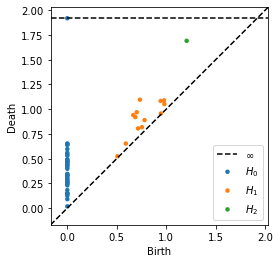

In [15]:
plot_diagrams(diagrams, show=True)

In [16]:
diagrams

[array([[0.        , 0.01737412],
        [0.        , 0.08986974],
        [0.        , 0.12428085],
        [0.        , 0.14127208],
        [0.        , 0.14979352],
        [0.        , 0.15047252],
        [0.        , 0.18195675],
        [0.        , 0.22961727],
        [0.        , 0.24418578],
        [0.        , 0.24980028],
        [0.        , 0.26303965],
        [0.        , 0.26823804],
        [0.        , 0.2707715 ],
        [0.        , 0.29075551],
        [0.        , 0.29636416],
        [0.        , 0.3151747 ],
        [0.        , 0.3258639 ],
        [0.        , 0.33519495],
        [0.        , 0.33714533],
        [0.        , 0.3457478 ],
        [0.        , 0.39731833],
        [0.        , 0.41379941],
        [0.        , 0.43381697],
        [0.        , 0.43406606],
        [0.        , 0.44580698],
        [0.        , 0.46147129],
        [0.        , 0.46396312],
        [0.        , 0.47065115],
        [0.        , 0.4774113 ],
        [0.   

# Code for calculating zero dimensional persistence homology from scratch

In [17]:
# function to check whether the selected edge is going to close a potential loop

def expecting_a_cycle(actual_new_test, my_edge):

    left_ind = my_edge[0][0]
    right_ind = my_edge[0][1]
    #print(right_ind)
    found_right_ind = False
    going_nowhere= False

    new_test = actual_new_test

    tracker = 0
    no_branches_formed = True
    while (not(found_right_ind) or not(going_nowhere)):

        #Checking where all am I finding the left point of the edge in the edges I have already selected 
        positions1 = (new_test == left_ind).nonzero(as_tuple=False)

        #print("adjaoined point index ",positions1)
        #print("Shape of positions found", positions1.shape)

        #print("Number of branches rising : ", positions1.shape[0])

        if(positions1.shape[0]>1):
            edge_to_delete = new_test[positions1[0][0]]
            no_branches_formed = False
            #print("The edge to be deleted ", edge_to_delete)
            #print("The shape of the actual edge to be deleted ", edge_to_delete.shape[0])
        
        branches_rising = positions1.shape[0]
        #print("To fix for loop range",branches_rising)



        if(positions1.shape[0]==0):
            #if(i==(positions1.shape[0]-1)):
            going_nowhere= True
            #print("There is no loop")
            #print("I got nowhere")
            if(no_branches_formed):
                break
            
            #print("I should delete the edge : ", edge_to_delete)
            left_ind = my_edge[0][0]

            #find the position of the edge to be deleted in the actual t
            deletable_edge_position1 = (actual_new_test == edge_to_delete[0]).nonzero(as_tuple=False)
            deletable_edge_position2 = (actual_new_test == edge_to_delete[1]).nonzero(as_tuple=False)

            deletable_edge_position1 = deletable_edge_position1[:,0]

            deletable_edge_position2 = deletable_edge_position2[:,0]

            #print("What happened : ", deletable_edge_position1, deletable_edge_position1)

            a_cat_b1, counts1 = torch.cat([deletable_edge_position1, deletable_edge_position2]).unique(return_counts=True)
            deletable_row_position = a_cat_b1[torch.where(counts1.gt(1))]
            #print("Here it is : ", deletable_row_position.shape[0])

            if(deletable_row_position.shape[0]==0):
                #print(" Your edge is not going to form a cycle ")
                going_nowhere = True
                break

            deletable_row_position = deletable_row_position[0]


            #print("Position of edge to be deleted as columns ", deletable_edge_position1, deletable_edge_position2)
            #print("Deletable row position : ", deletable_row_position)


            #now deleting the row to be deleted
            actual_new_test = torch.cat((actual_new_test[:deletable_row_position], actual_new_test[deletable_row_position+1:]))
            new_test = actual_new_test
            #edge_to_delete = torch.tensor([0])
            #print("shape of edge to delete", edge_to_delete.shape[0])
            #print(new_test)


            positions1 = (new_test == left_ind).nonzero(as_tuple=False)
            #print()
            #print()
            #print()

            if(tracker ==0):
                break


        
        if(positions1.shape[0]>1):
            edge_to_delete = new_test[positions1[0][0]]
            no_branches_formed = False
                
                
        #for i in range(positions1.shape[0]):

        first_position = positions1[0][0]
        #print("Where is it ",first_position)

        # What is the edge at the position I found
        adj_edge1 = new_test[positions1[0][0]]
        #print("The new edge is ",adj_edge1)


        #Consecutive index of the newly found edge
        other_end1 = abs(positions1 - torch.tensor([[0, 1]]))
        #print("The new point found is at the index ",other_end1)

        #consecutive point of the newly found edge

        consec_pt1 = new_test[other_end1[0][0]][other_end1[0][1]]
        consec_pt1 = int(consec_pt1)
        #print(" The new point is ",consec_pt1)

        if(consec_pt1 == right_ind):
            found_right_ind = True
            #print("This forms a loop")
            #print("traversions : ", tracker)
            break



        else:
            left_ind = consec_pt1
            new_test = torch.cat((new_test[:first_position], new_test[first_position+1:]))
            tracker = tracker+1

    #print("The cycle exists : ", found_right_ind)




    
    return found_right_ind



In [18]:
#upper diagonal matrix of distance matrix
upp_diag = torch.triu(dist_matrix, diagonal=1)

#sorting the same
ff = upp_diag.sort()

sorted_upper_diag_edges = ff[0]

sorted_upper_diag_indices = ff[1]

#flattening all the upperdiagonal elements in a single array
flattened_uppdg_edges = torch.flatten(sorted_upper_diag_edges)

#removing all the zeros from them
non_zero_flattened_uppdg_edges = flattened_uppdg_edges[flattened_uppdg_edges.nonzero()]

non_zero_flattened_uppdg_edges = non_zero_flattened_uppdg_edges.reshape(non_zero_flattened_uppdg_edges.shape[0])

increasing_edges = non_zero_flattened_uppdg_edges.sort()[0]

In [19]:
selected_edges = torch.tensor([])
#end_indices = torch.tensor([])
dead_indices = torch.tensor([])
potential_triangles = torch.tensor([])
edge_leads_to_loop = False

for i in range(increasing_edges.shape[0]):
    a = (upp_diag == increasing_edges[i]).nonzero(as_tuple=False)
    #a = a.reshape(a.shape[1])
    '''
    print("It no: ", i)
    print("The edge is : ", increasing_edges[i])
    print("Current indices : ",a)
    '''
    #check if the edge could potentially cause the birth of a loop or a triangle (or a higher order simplex)
    
    #shutting on from here
    '''
    closure_edge = a
    print("closure edge shape", closure_edge.shape)
    n1 = closure_edge[0][0]
    n2 = closure_edge[0][1]
    
    fir = dist_matrix[:,n1] < dist_matrix[n1][n2]
    sec = dist_matrix[:,n2] < dist_matrix[n1][n2]

    loop_nodes_one = (fir == True).nonzero(as_tuple=False)
    loop_nodes_two = (sec == True).nonzero(as_tuple=False)
    #loop intersections
    a_cat_bl, countsl = torch.cat([loop_nodes_one, loop_nodes_two]).unique(return_counts=True)
    loops_joined= a_cat_bl[torch.where(countsl.gt(1))]
    
    
    closure_nodes = closure_edge.reshape(2,1)
    a_cat_b, counts = torch.cat([loop_nodes_one, loop_nodes_two, closure_nodes]).unique(return_counts=True)
    nodes_after_join = a_cat_b[torch.where(counts.gt(1))]
    is_it_a_loop = ((loop_nodes_one.shape[0] + loop_nodes_two.shape[0] + closure_nodes.shape[0])/2 == nodes_after_join.shape[0]) and (nodes_after_join.shape[0]>=3)
    is_it_triangle = nodes_after_join.shape[0]==3
    print("This edge could give birth to a loop/triangle ", is_it_a_loop)
    print("How many nodes after joining : ", nodes_after_join.shape[0]>2)
    '''
    #shutting off here
    
    #print(a[0][0])
    '''
    print("currently dead indices :  " )
    print(dead_indices)
    '''

    first_index = a[0][0]
    first_index = first_index.reshape(1,1)
    second_index = a[0][1]
    
    
    
    second_index = second_index.reshape(1,1)
    '''
    print("1st cond ",(first_index in dead_indices))
    print("2nd cond ", (not(second_index in dead_indices)))
    print("Selected edge indices until now : ", selected_edges)
    '''
    if(selected_edges.shape[0] > 1):
        edge_leads_to_loop = expecting_a_cycle(selected_edges, a)
        '''
        print("what happend : ", edge_leads_to_loop)'''
    
    #print("check", loops_joined.shape[0])
    
    if(not(edge_leads_to_loop)):
        selected_edges = torch.cat(((selected_edges, a)), 0)
        
        
        
    
    '''
    if(selected_edges.shape[0] >=1):
        print("Tracking connected components", selected_edges[:,0])'''
    
    #for long test
    '''
            
    #if((loops_joined.shape[0]<1) and not(edge_leads_to_loop)):
    if( not(edge_leads_to_loop)):
        #print("did it come here", loops_joined.shape[0])

    
        if( first_index==0 and (not(second_index in dead_indices)) ):
            
            print("dead point : ", second_index)
            if(second_index in selected_edges):
                dead_indices = torch.cat(((dead_indices, second_index)), 0)
            selected_edges = torch.cat(((selected_edges, a)), 0)
            #freshened_edges = torch.cat(((freshened_edges, a)), 0)

        elif((not(first_index in dead_indices))):
            
            
            if((second_index in selected_edges) ):
                dead_indices = torch.cat(((dead_indices, second_index)), 0)
                
                print("dead point : ", second_index)
                selected_edges = torch.cat(((selected_edges, a)), 0)

            else:
                if(first_index in selected_edges):
                    dead_indices = torch.cat(((dead_indices, first_index)), 0)
                
                print("dead point : ", first_index)
                selected_edges = torch.cat(((selected_edges, a)), 0)

            
            #end_indices = torch.cat(((end_indices, second_index)), 0)


        elif((first_index in dead_indices) and (not(second_index in dead_indices)) ):
            
            print("dead point : ", second_index)
            
            if(second_index in selected_edges):
                dead_indices = torch.cat(((dead_indices, second_index)), 0)
                selected_edges = torch.cat(((selected_edges, a)), 0)
            #freshened_edges = torch.cat(((freshened_edges, a)), 0)

    '''        


In [20]:
selected_edges

tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.],
        [23., 32.],
        [ 2., 31.],
        [33., 36.],
        [10., 22.],
        [ 0., 29.],
        [10., 23.],
        [ 0., 21.],
        [19., 29.]])

In [21]:
zeroD_PH = torch.tensor([])


for i in range(selected_edges.shape[0]):
    #print(dist_matrix[int(selected_edges[i][0])][int(selected_edges[i][1])])
    
    death = dist_matrix[int(selected_edges[i][0])][int(selected_edges[i][1])]
    death = death.reshape(1,1)
    
    #print(death.shape)
    zeroD_PH = torch.cat(((zeroD_PH, death)), 0)

In [22]:
zeroD_PH.shape[0]

39

In [23]:
births = torch.zeros(zeroD_PH.shape[0], 1)


In [24]:
zeroD_PH_births_deaths = torch.cat((births, zeroD_PH ),1)
zeroD_PH_births_deaths

tensor([[0.000000000000000000000000000000, 0.017374118682684288467177324833],
        [0.000000000000000000000000000000, 0.089869739067163195711529510845],
        [0.000000000000000000000000000000, 0.124280851300592506958331284750],
        [0.000000000000000000000000000000, 0.141272077920585548138632248083],
        [0.000000000000000000000000000000, 0.149793524559641677562638051313],
        [0.000000000000000000000000000000, 0.150472522408578002206525070505],
        [0.000000000000000000000000000000, 0.181956753103587748343628049952],
        [0.000000000000000000000000000000, 0.229617268514369365917104914843],
        [0.000000000000000000000000000000, 0.244185769446132905358126663486],
        [0.000000000000000000000000000000, 0.249800280224022147601559140639],
        [0.000000000000000000000000000000, 0.263039654805126310588292426473],
        [0.000000000000000000000000000000, 0.268238047263992696045420416340],
        [0.000000000000000000000000000000, 0.2707715088409414772

In [25]:
zeroD_PH_births_deaths.shape

torch.Size([39, 2])

In [26]:
zeroD_PH_births_deaths[30]

tensor([0.000000000000000000000000000000, 0.492063918612206385727603219493],
       dtype=torch.float64)

In [27]:
diagrams[0][30]

array([0.        , 0.49206391])

In [28]:
diagrams[0].shape

(40, 2)

In [29]:
for i in range(zeroD_PH_births_deaths.shape[0]):
    print("No. ",i)
    print(abs(zeroD_PH_births_deaths[i] - diagrams[0][i]) <= 10**(-3) )

No.  0
tensor([True, True])
No.  1
tensor([True, True])
No.  2
tensor([True, True])
No.  3
tensor([True, True])
No.  4
tensor([True, True])
No.  5
tensor([True, True])
No.  6
tensor([True, True])
No.  7
tensor([True, True])
No.  8
tensor([True, True])
No.  9
tensor([True, True])
No.  10
tensor([True, True])
No.  11
tensor([True, True])
No.  12
tensor([True, True])
No.  13
tensor([True, True])
No.  14
tensor([True, True])
No.  15
tensor([True, True])
No.  16
tensor([True, True])
No.  17
tensor([True, True])
No.  18
tensor([True, True])
No.  19
tensor([True, True])
No.  20
tensor([True, True])
No.  21
tensor([True, True])
No.  22
tensor([True, True])
No.  23
tensor([True, True])
No.  24
tensor([True, True])
No.  25
tensor([True, True])
No.  26
tensor([True, True])
No.  27
tensor([True, True])
No.  28
tensor([True, True])
No.  29
tensor([True, True])
No.  30
tensor([True, True])
No.  31
tensor([True, True])
No.  32
tensor([True, True])
No.  33
tensor([True, True])
No.  34
tensor([True, Tr